<a href="https://colab.research.google.com/github/Micahgs/Data-science-Assignments/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import StandardScaler

In [32]:
df = pd.read_csv('https://raw.githubusercontent.com/Micahgs/DATA-science-asiignment-datasets/refs/heads/main/wine.csv')

In [33]:
print(df.describe())
print(df.shape)
print(df.info())
print(df.isnull().sum())

             Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058090   
std      0.625851    0.998859       0.1

In [34]:
# Droping target col
features = df.drop("Type", axis=1)

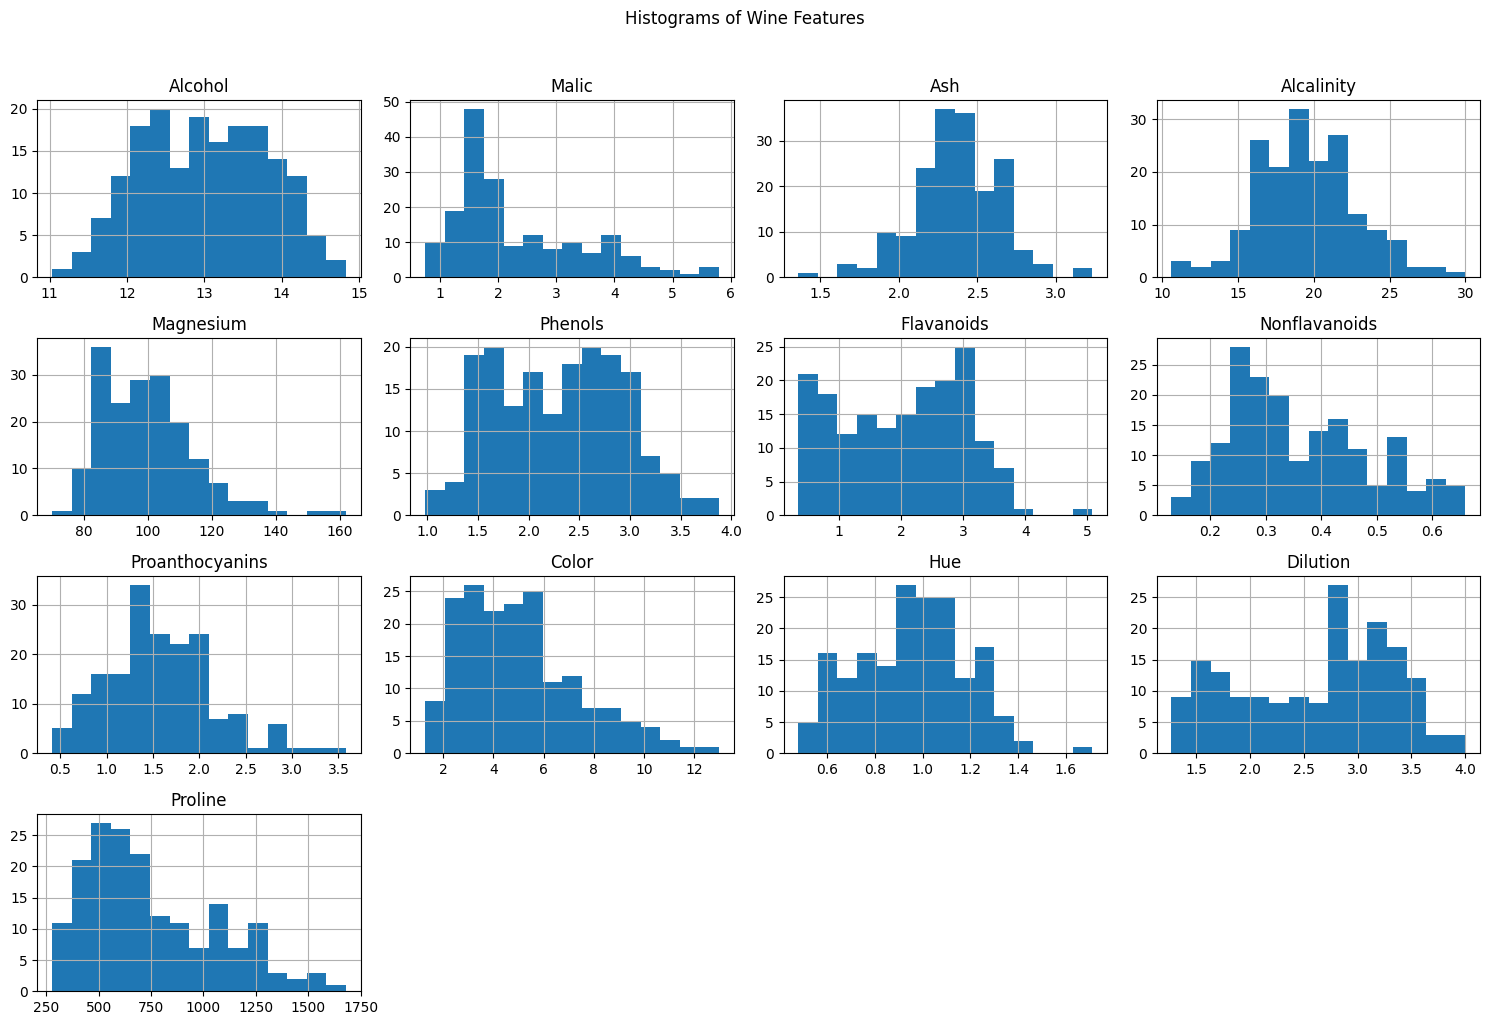

In [35]:
# Histograms
features.hist(figsize=(15, 10), bins=15)
plt.suptitle("Histograms of Wine Features", y=1.02)
plt.tight_layout()
plt.show()

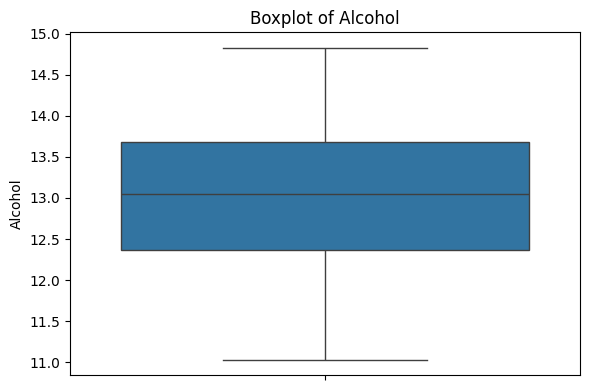

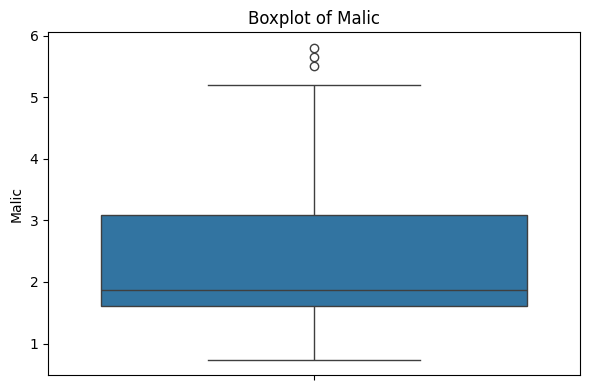

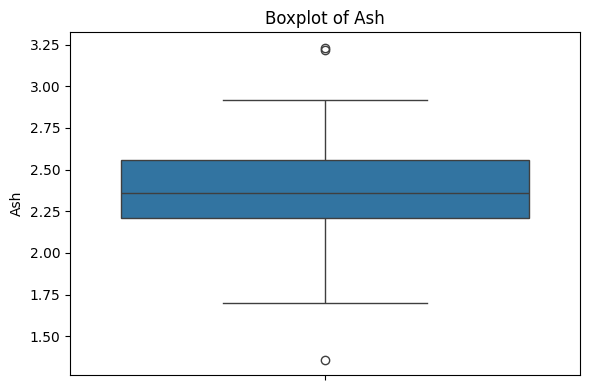

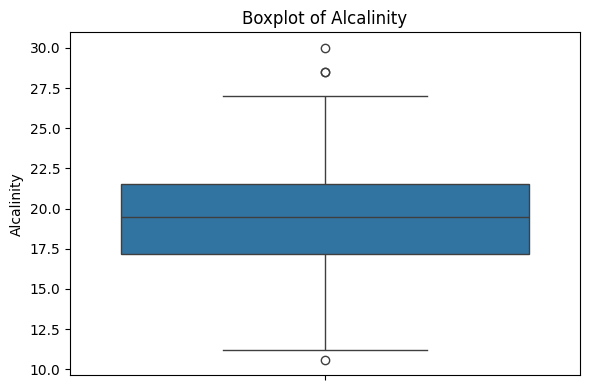

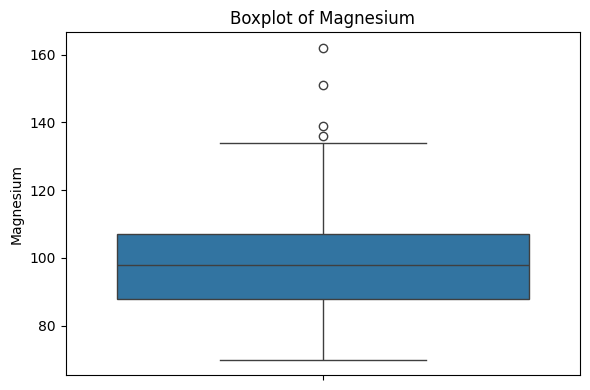

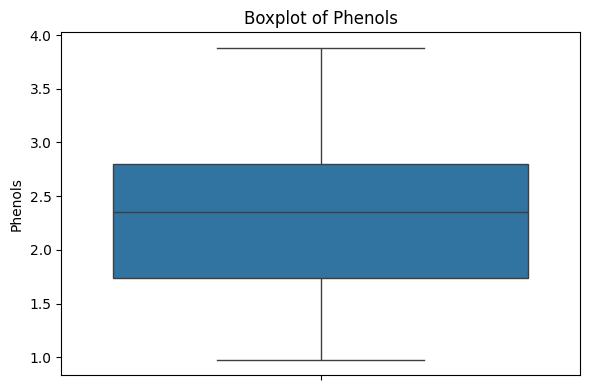

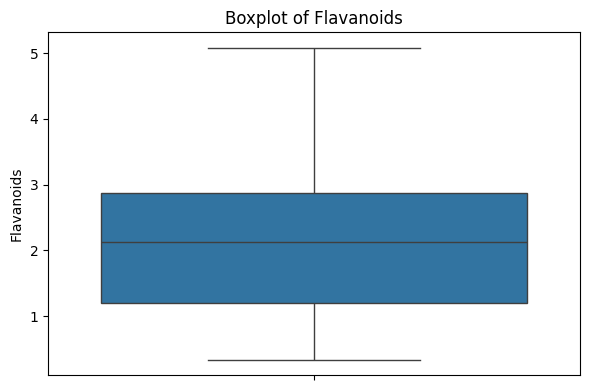

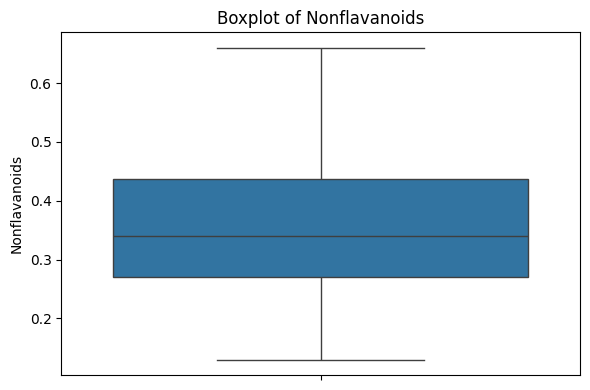

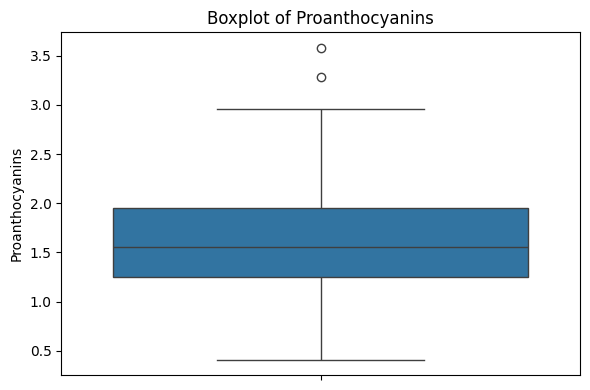

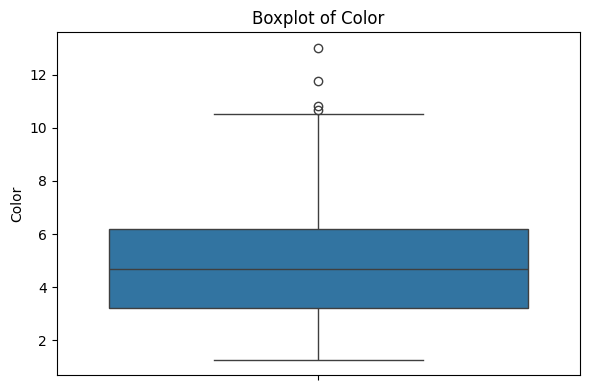

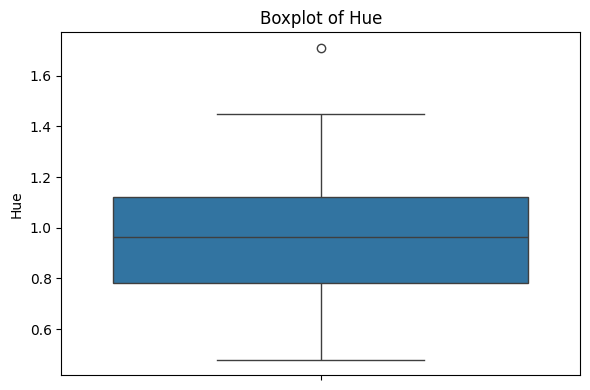

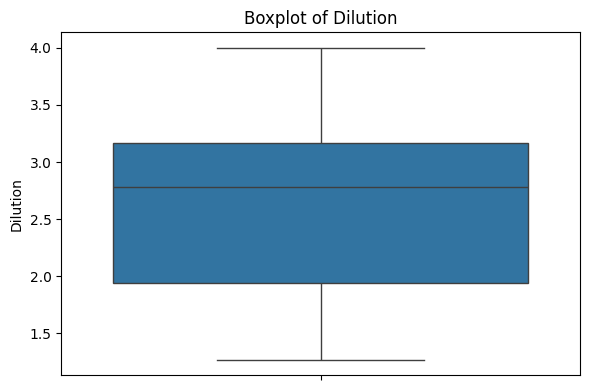

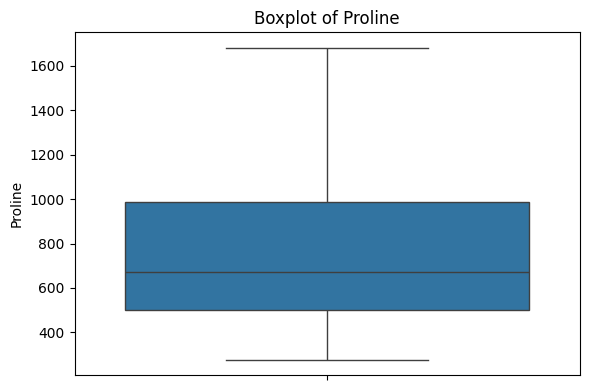

In [36]:
for col in features.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=features[col])
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

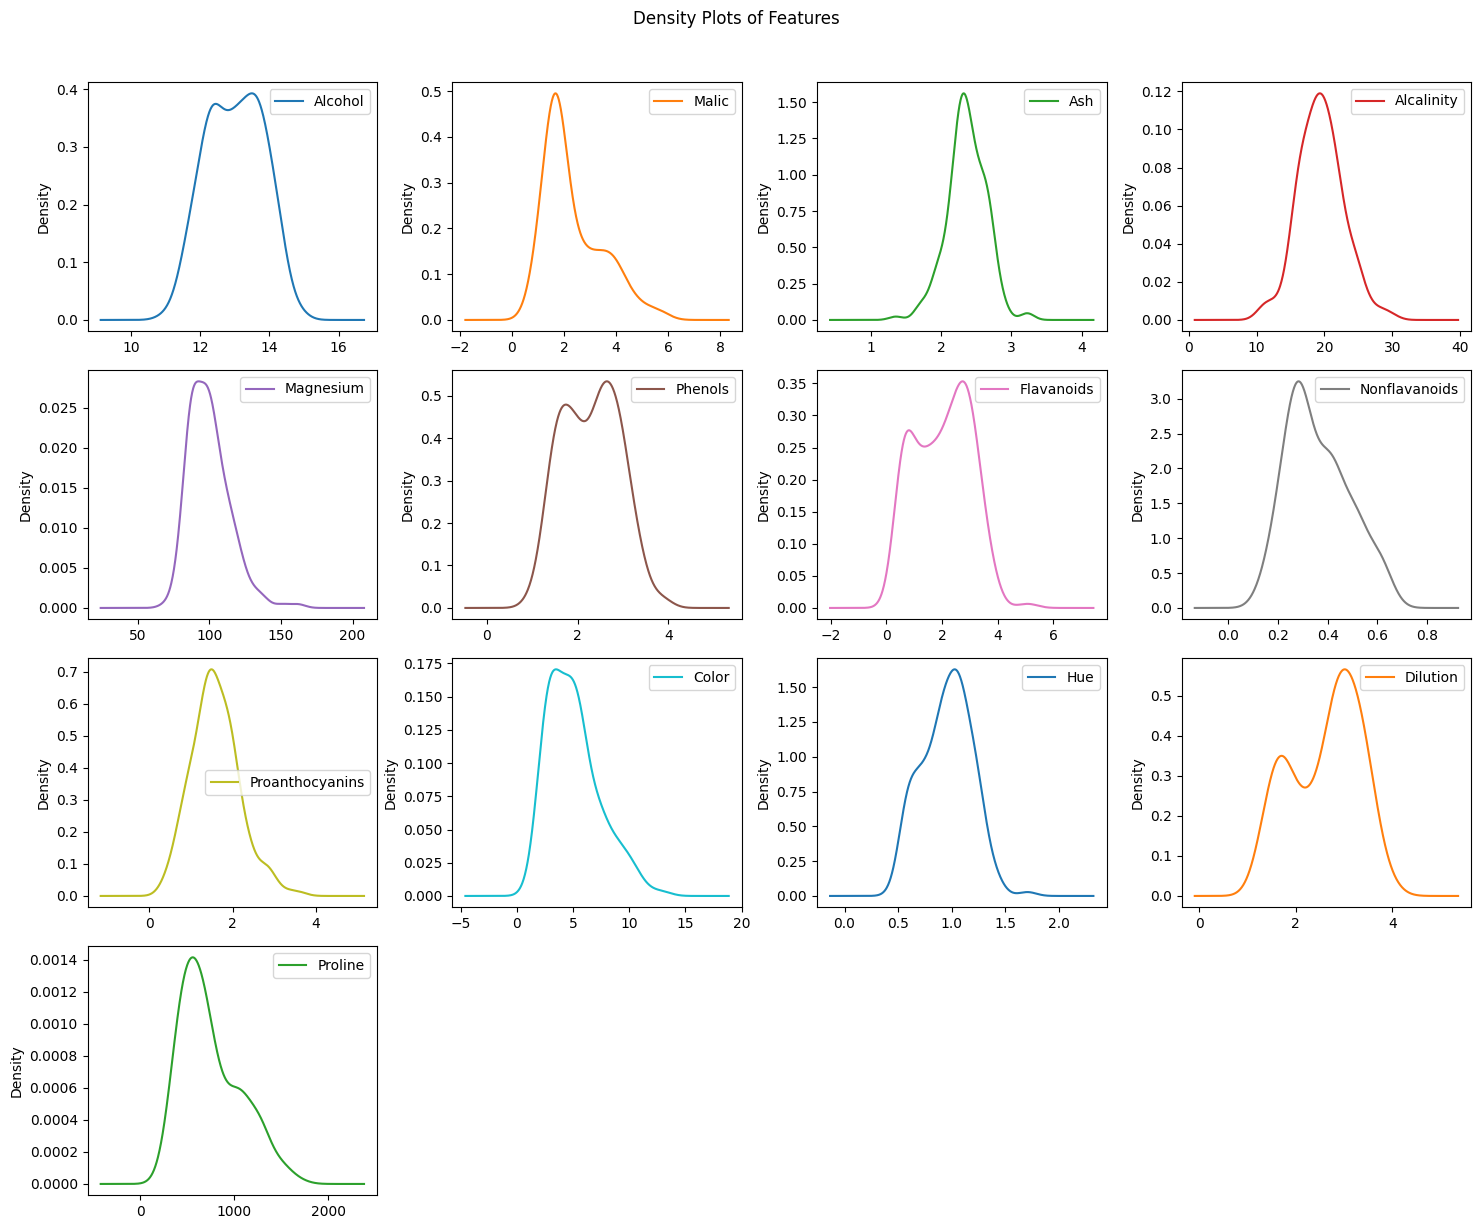

In [37]:
# Density Plots
features.plot(kind='density', subplots=True, layout=(4, 4), figsize=(15, 12), sharex=False)
plt.suptitle("Density Plots of Features", y=1.02)
plt.tight_layout()
plt.show()

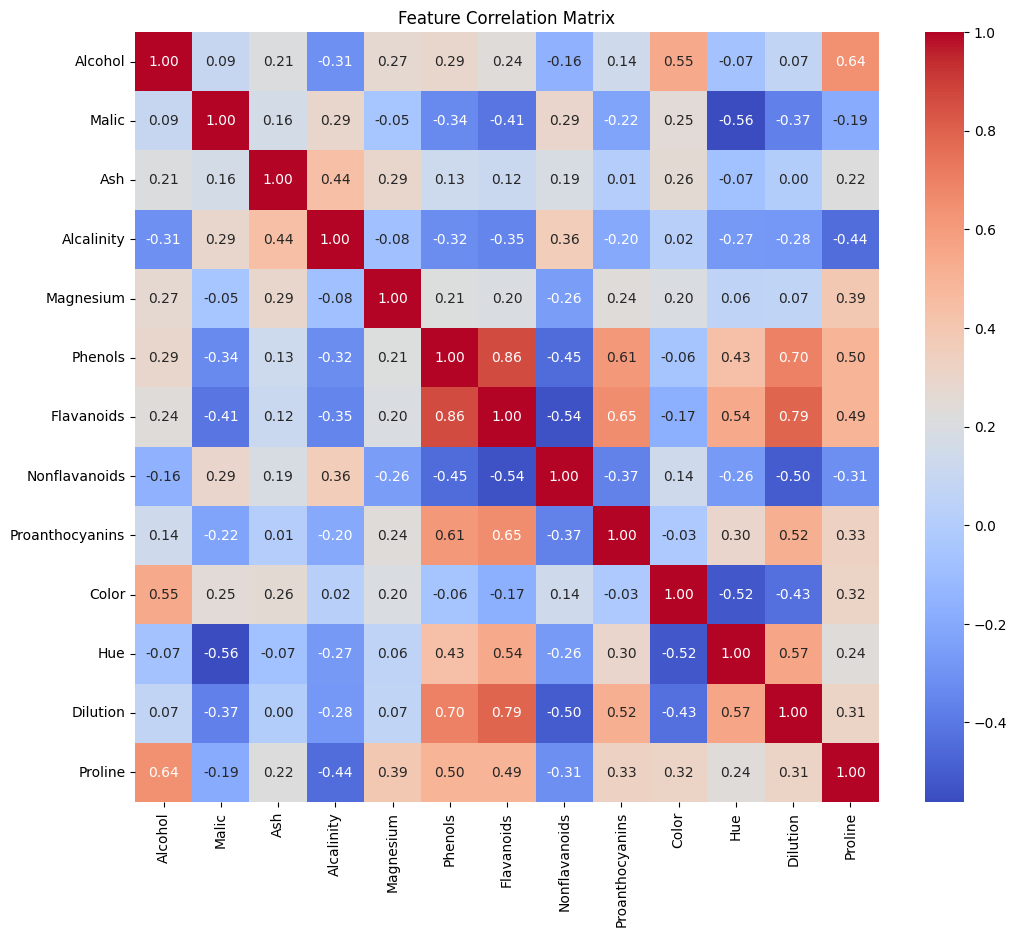

In [38]:
# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(features.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()


In [39]:


X = df.drop('Type', axis=1)
y = df['Type']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


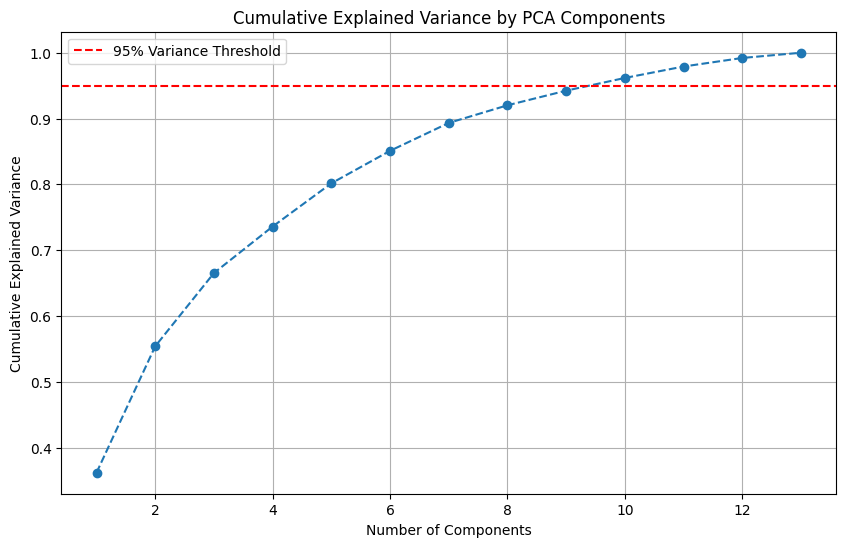

In [40]:


pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.axhline(y=0.95, color='red', linestyle='--', label='95% Variance Threshold')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.legend()
plt.show()


In [41]:

pca = PCA(n_components=3)  # or use the number you decided from scree plot
X_pca = pca.fit_transform(X_scaled)


In [42]:
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df['Type'] = y.values  # Add the class labels back
pca_df.head()


,PC1,PC2,PC3,Type
0,3.316751,1.443463,-0.165739,1
1,2.209465,-0.333393,-2.026457,1
2,2.516740,1.031151,0.982819,1
3,3.757066,2.756372,-0.176192,1
4,1.008908,0.869831,2.026688,1


# Clustering on Orignal dataset

In [43]:
kmeans_orig = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_orig = kmeans_orig.fit_predict(X_scaled)


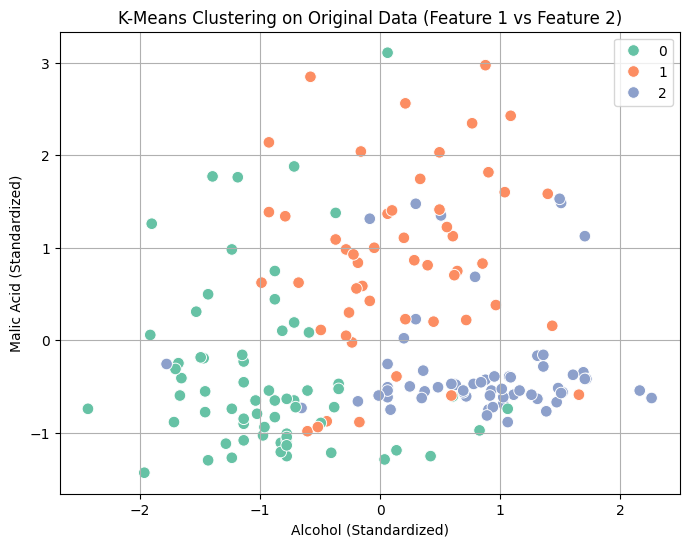

In [44]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels_orig, palette='Set2', s=70)
plt.title('K-Means Clustering on Original Data (Feature 1 vs Feature 2)')
plt.xlabel('Alcohol (Standardized)')
plt.ylabel('Malic Acid (Standardized)')
plt.grid(True)
plt.show()

In [45]:
sil_orig = silhouette_score(X_scaled, labels_orig)
dbi_orig = davies_bouldin_score(X_scaled, labels_orig)

print(f'Silhouette Score (Original Data): {sil_orig:.3f}')
print(f'Davies-Bouldin Index (Original Data): {dbi_orig:.3f}')

Silhouette Score (Original Data): 0.285
Davies-Bouldin Index (Original Data): 1.389


# Clustering on PCA Datam

In [46]:
kmeans_pca = KMeans(n_clusters=3, random_state=42)
clusters_pca = kmeans_pca.fit_predict(pca_df[['PC1', 'PC2', 'PC3']])

In [47]:
pca_df['Cluster_PCA'] = clusters_pca

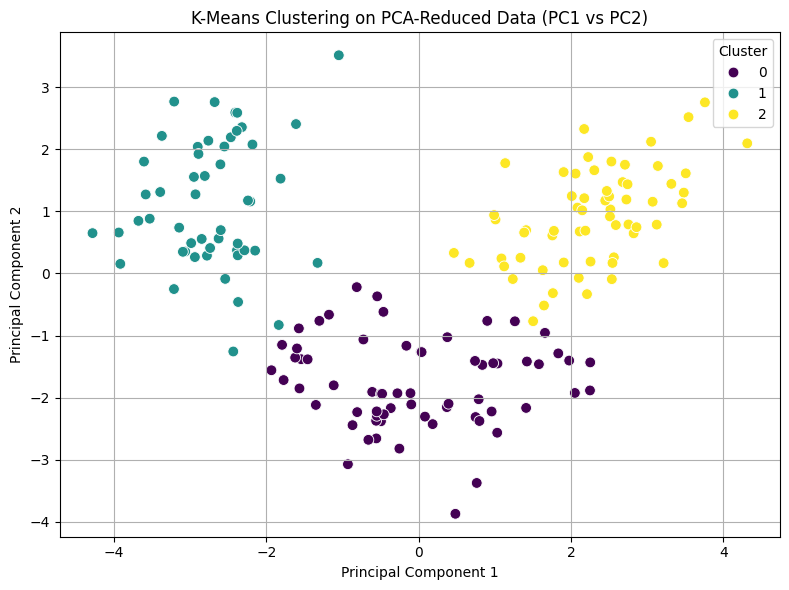

In [48]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster_PCA', palette='viridis', s=60)
plt.title('K-Means Clustering on PCA-Reduced Data (PC1 vs PC2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


In [49]:
silhouette_pca = silhouette_score(pca_df[['PC1', 'PC2', 'PC3']], clusters_pca)
dbi_pca = davies_bouldin_score(pca_df[['PC1', 'PC2', 'PC3']], clusters_pca)
print(f"Silhouette Score (PCA Data): {silhouette_pca:.3f}")
print(f"Davies-Bouldin Index (PCA Data): {dbi_pca:.3f}")

Silhouette Score (PCA Data): 0.454
Davies-Bouldin Index (PCA Data): 0.839


# ***Comparison and Analysis***

**Clustering Results Comparison:**

Silhouette Score (Original Data): 0.285

Davies–Bouldin Index (Original Data): 1.389

Silhouette Score (PCA Data): 0.454

Davies–Bouldin Index (PCA Data): 0.839

The clustering performance on the PCA-transformed data is noticeably better than on the original data. A higher silhouette score indicates more distinct and well-separated clusters, while a lower Davies–Bouldin index suggests that the clusters are compact and have less overlap.

**Similarities and Differences:**

Both clustering results used the same algorithm (K-Means) and number of clusters.

The general structure of clusters was preserved in both, but the separation was clearer in the PCA-transformed data.

The PCA data revealed hidden structure that wasn’t as apparent in the original feature space.

**Impact of Dimensionality Reduction on Clustering:**

PCA removed redundancy and noise by focusing on the most informative directions (principal components).

This led to better-defined clusters in fewer dimensions.

The results suggest that dimensionality reduction can enhance clustering by simplifying the data without major loss of information.

**Trade-Offs Between PCA and Clustering on Original Data:**

Clustering on the original dataset retains the interpretability of features, which is valuable for domain-specific insights and understanding. However, applying PCA before clustering can enhance clustering performance by reducing dimensionality, eliminating noise, and capturing the most significant variance in the data. The transformed components, though, lose direct interpretability.

The decision between these approaches should align with the analysis objective. If understanding the role of original features in cluster formation is essential, clustering on the original data is preferable. If the primary goal is to achieve clearer, more compact clusters with improved performance metrics, applying PCA prior to clustering is more effective.



# **Conclusion and Insights**

**Key Takeaways**

Clustering worked better after PCA (higher silhouette, lower Davies–Bouldin score).

PCA simplified the data while keeping most of its information.

Practical Use

PCA + clustering is helpful when the data has many features or overlaps.

Clustering on original data is better when you need to explain the results clearly.

When to Use What

Use PCA when you care more about patterns and performance.

Use original data when meaning and interpretation matter more.

